# TM10007 Assignment

In [ ]:
# Run this to use from colab environment
!pip install -q --upgrade git+https://github.com/jveenland/tm10007_ml.git

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 61.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 33.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 42.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 65.6 MB/s eta 0:00:00


## Data loading and cleaning

Below are functions to load the dataset of your choice. After that, it is all up to you to create and evaluate a classification method. Beware, there may be missing values in these datasets. Good luck!

In [ ]:
# Libraries
import pandas as pd

from worcgist.load_data import load_data

In [ ]:
# Load data
data = load_data()

data['label'] = data['label'].map({'non-GIST': 0, 'GIST': 1})

y = data['label']
x = data.drop(columns=['label'])

# Calculate basic statistics
n_samples = len(y)
n_features = len(x.columns)

n_missing = data.isna().sum().sum()
n_zero = (data == 0).sum().sum()

# Print basic statistics
print(f'The number of samples: {n_samples}')
print(f'The number of features: {n_features}')
print(f'The number of datapoints: {n_samples * n_features}')
print(f"The number of missing values: {n_missing}")
print(f"The number of zero values: {n_zero}")

data.info()
data.describe()
data.duplicated()

The number of samples: 246
The number of features: 493
The number of datapoints: 121278
The number of missing values: 0
The number of zero values: 6848
<class 'pandas.core.frame.DataFrame'>
Index: 246 entries, GIST-001_0 to GIST-246_0
Columns: 494 entries, label to PREDICT_original_phasef_phasesym_entropy_WL3_N5
dtypes: float64(468), int64(26)
memory usage: 951.3+ KB


ID
GIST-001_0    False
GIST-002_0    False
GIST-003_0    False
GIST-004_0    False
GIST-005_0    False
              ...  
GIST-242_0    False
GIST-243_0    False
GIST-244_0    False
GIST-245_0    False
GIST-246_0    False
Length: 246, dtype: bool

## Pre-processing

In [1]:
from sklearn.feature_selection import SelectKBest, f_classif

selector = SelectKBest(score_func=f_classif, k=50)  # or 50, or try multiple values
x_reduced_array = selector.fit_transform(x, y)
selected_feature_names = x.columns[selector.get_support()]
x_reduced = pd.DataFrame(x_reduced_array, columns=selected_feature_names)
print(x_reduced.info())

NameError: name 'x' is not defined

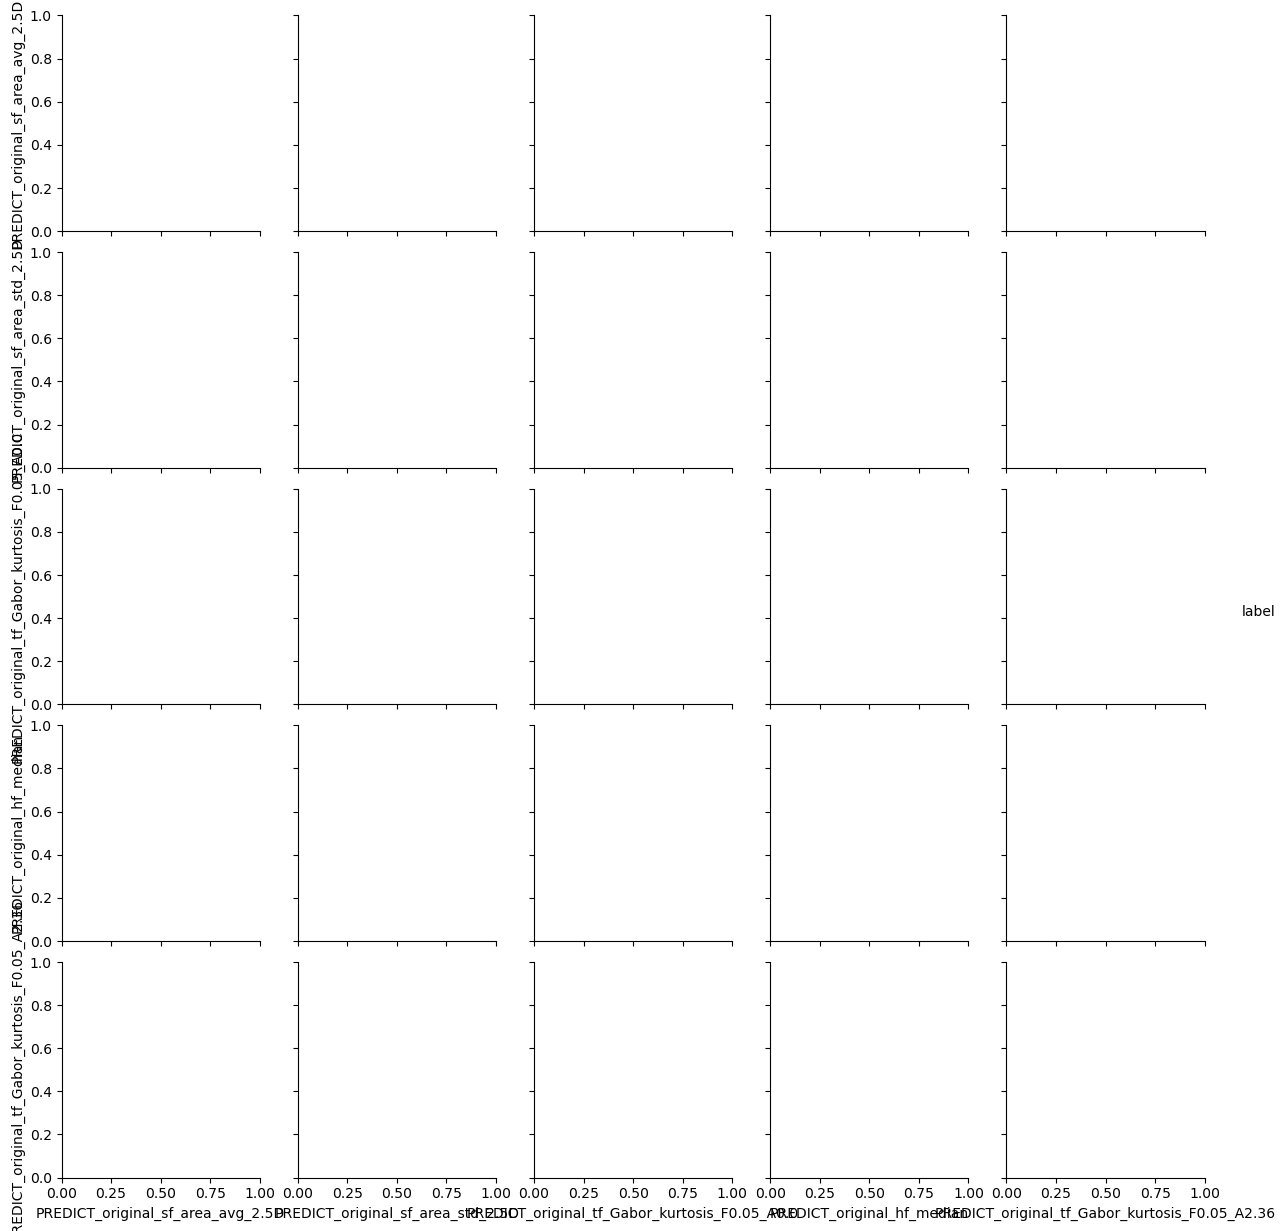

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate variance for each feature
feature_variances = x_reduced.var()

# Select the top 5 features with the highest variance
top_features = feature_variances.nlargest(5).index

# Merge the top features with the label
merged_data = pd.concat([x_reduced[top_features], y], axis=1)

# Create a seaborn pairplot for the top features with colors based on labels
sns.pairplot(merged_data, hue='label', diag_kind="kde")
plt.show()


In [ ]:
from scipy.stats import shapiro

def check_normal_distribution(data, alpha=0.05):
    results = {}
    for col in data.columns:
        p = shapiro(data[col])[1]
        results[col] = p > alpha
    return pd.DataFrame([results])

results = check_normal_distribution(x)
print(results)

   PREDICT_original_sf_compactness_avg_2.5D  \
0                                     False   

   PREDICT_original_sf_compactness_std_2.5D  \
0                                     False   

   PREDICT_original_sf_rad_dist_avg_2.5D  \
0                                  False   

   PREDICT_original_sf_rad_dist_std_2.5D  \
0                                  False   

   PREDICT_original_sf_roughness_avg_2.5D  \
0                                   False   

   PREDICT_original_sf_roughness_std_2.5D  \
0                                   False   

   PREDICT_original_sf_convexity_avg_2.5D  \
0                                   False   

   PREDICT_original_sf_convexity_std_2.5D  PREDICT_original_sf_cvar_avg_2.5D  \
0                                   False                              False   

   PREDICT_original_sf_cvar_std_2.5D  ...  \
0                              False  ...   

   PREDICT_original_phasef_phasesym_median_WL3_N5  \
0                                           False   



/opt/miniconda3/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: Input data has range zero. The results may not be accurate.
  res = hypotest_fun_out(*samples, **kwds)


In [ ]:
from scipy.stats import zscore

# Outlier removal based on normal-distribution assumption

def replace_outliers(df, is_normal):
    """
    Replace outliers in the given DataFrame based on the distribution type of each column.

    Parameters:
    df (pd.DataFrame): The input DataFrame containing numerical data.
    is_normal (pd.Series): A Series indicating whether each column in the DataFrame is normally distributed (True) or not (False).

    Returns:
    pd.DataFrame: The DataFrame with outliers replaced by the respective bounds.
    """
    threshold_nd = 0.5  # z-score threshold for normally distributed data
    threshold_nnd = 1.5  # IQR threshold for non-normally distributed data
    for column in df.columns:
        if is_normal[column]:
            # Use z-score for normally distributed columns
            mean = df[column].mean()
            std = df[column].std()
            lower_bound = mean - threshold_nd * std
            upper_bound = mean + threshold_nd * std
            outliers = (df[column] > upper_bound) | (df[column] < lower_bound)
            df.loc[df[column] > upper_bound, column] = upper_bound
            df.loc[df[column] < lower_bound, column] = lower_bound
        else:
            # Use IQR for non-normally distributed columns
            Q1 = df[column].quantile(0.25)
            Q3 = df[column].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - threshold_nnd * IQR
            upper_bound = Q3 + threshold_nnd * IQR
            outliers = (df[column] > upper_bound) | (df[column] < lower_bound)
            df.loc[df[column] > upper_bound, column] = upper_bound
            df.loc[df[column] < lower_bound, column] = lower_bound
    return df

df_no_outliers = replace_outliers(x, results.iloc[0])
print("Max of original data (first 5 columns):")
print(x.iloc[:, :5].describe().loc['max'])
print("Max of data without outliers (first 5 columns):")
print(df_no_outliers.iloc[:, :5].describe().loc['max'])